In [12]:
pip install langgraph langchain langchain_community langchainhub langchain_groq langchain_core langchain_huggingface bs4 tiktoken chromadb langchain_google_genai

  Using cached langgraph-0.2.62-py3-none-any.whl.metadata (15 kB)
  Using cached langchainhub-0.1.21-py3-none-any.whl.metadata (659 bytes)
  Using cached langchain_groq-0.2.3-py3-none-any.whl.metadata (3.0 kB)
  Using cached langchain_core-0.3.29-py3-none-any.whl.metadata (6.3 kB)
  Using cached bs4-0.0.2-py2.py3-none-any.whl.metadata (411 bytes)
  Using cached tiktoken-0.8.0-cp311-cp311-win_amd64.whl.metadata (6.8 kB)
  Using cached langgraph_sdk-0.1.51-py3-none-any.whl.metadata (1.8 kB)
  Using cached aiohttp-3.11.11-cp311-cp311-win_amd64.whl.metadata (8.0 kB)
  Using cached pydantic-2.10.5-py3-none-any.whl.metadata (30 kB)
  Using cached typer-0.15.1-py3-none-any.whl.metadata (15 kB)
  Using cached orjson-3.10.14-cp311-cp311-win_amd64.whl.metadata (42 kB)
  Using cached filetype-1.2.0-py2.py3-none-any.whl.metadata (6.5 kB)
  Using cached google_generativeai-0.8.3-py3-none-any.whl.metadata (3.9 kB)
  Using cached yarl-1.18.3-cp311-cp311-win_amd64.whl.metadata (71 kB)
  Using cached g

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorboard 2.15.2 requires google-auth-oauthlib<2,>=0.5, which is not installed.
langchainplus-sdk 0.0.20 requires pydantic<2,>=1, but you have pydantic 2.10.5 which is incompatible.
mlflow 2.2.2 requires protobuf<5,>=3.12.0, but you have protobuf 5.29.3 which is incompatible.
tensorflow-intel 2.15.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 5.29.3 which is incompatible.


In [13]:
from typing import Annotated, Literal, Sequence, TypedDict
from langchain import hub
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field
from langgraph.graph.message import add_messages
from langgraph.prebuilt import tools_condition
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain.tools.retriever import create_retriever_tool
from langgraph.graph import END, StateGraph, START
from langgraph.prebuilt import ToolNode

C:\Users\malah\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3577: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain_core.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  exec(code_obj, self.user_global_ns, self.user_ns)
USER_AGENT environment variable not set, consider setting it to identify your requests.


In [14]:
from langchain_huggingface import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name = "all-MiniLM-L6-v2")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

C:\Users\malah\AppData\Roaming\Python\Python311\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\malah\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [15]:
from langchain_groq import ChatGroq
llm = ChatGroq(model_name = "Gemma2-9b-It")

In [16]:
llm.invoke("hi hello how are you?")

AIMessage(content="As an AI, I don't have feelings or experiences like humans do. But I'm here and ready to assist you!\n\nHow can I help you today? 😊\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 39, 'prompt_tokens': 15, 'total_tokens': 54, 'completion_time': 0.070909091, 'prompt_time': 7.6039e-05, 'queue_time': 0.020843511, 'total_time': 0.07098513}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-6fe20073-ee5e-49d2-a5f6-845d3638b079-0', usage_metadata={'input_tokens': 15, 'output_tokens': 39, 'total_tokens': 54})

In [17]:
urls = [
    "https://lilianweng.github.io/posts/2023-06-23-agent/",
    "https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/",
]

In [18]:
docs = [WebBaseLoader(url).load() for url in urls]

In [19]:
docs

[[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final res

In [20]:
text_splitter=RecursiveCharacterTextSplitter.from_tiktoken_encoder(chunk_size=100, chunk_overlap=5)

In [22]:
docs_list = [item for sublist in docs for item in sublist]

In [23]:
docs_list

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final resu

In [24]:
doc_splits=text_splitter.split_documents(docs_list)

In [25]:
doc_splits

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final resu

In [26]:
vectorstore=Chroma.from_documents(
    documents=doc_splits,
    collection_name="rag-chrome",
    embedding=embeddings
    
)

In [27]:
retriever=vectorstore.as_retriever()

In [28]:
retriever_tool = create_retriever_tool(
    retriever,
    "retrieve_blog_posts",
    "Search and return information about Lilian Weng blog posts on LLM agents, prompt engineering, and adversarial attacks on LLMs.You are a specialized assistant. Use the 'retriever_tool' **only** when the query explicitly relates to LangChain blog data. For all other queries, respond directly without using any tool. For simple queries like 'hi', 'hello', or 'how are you', provide a normal response.",
    
)

In [29]:
tools=[retriever_tool]

In [35]:
retrieve=ToolNode([retriever_tool])

In [36]:
llm_with_tools=llm.bind_tools(tools)

In [30]:
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], add_messages]

In [31]:
def ai_assistant(state:AgentState):
    print("---CALL AGENT---")
    messages = state['messages']
    print(f"this is my message: {messages}")
    
    if len(messages)>1:
        response=llm.invoke(messages[-1].content)
        return {"messages": [response]}
    else:
        llm_with_tool = llm.bind_tools(tools)
        response = llm_with_tool.invoke(messages)
        #response=handle_query(messages)
        return {"messages": [response]}

In [41]:
class grade(BaseModel):
    binary_score:str=Field(description="Relevance score 'yes' or 'no'")

In [42]:
def grade_documents(state:AgentState)->Literal["Output_Generator", "Query_Rewriter"]:
    llm_with_structure_op=llm.with_structured_output(grade)
    
    prompt=PromptTemplate(
        template="""You are a grader deciding if a document is relevant to a user’s question.
                    Here is the document: {context}
                    Here is the user’s question: {question}
                    If the document talks about or contains information related to the user’s question, mark it as relevant. 
                    Give a 'yes' or 'no' answer to show if the document is relevant to the question.""",
                    input_variables=["context", "question"]
                    )
    chain = prompt | llm_with_structure_op
    
    messages = state["messages"]
    print(f"message from the grader: {messages}")
    last_message = messages[-1]
    question = messages[0].content
    docs = last_message.content
    scored_result = chain.invoke({"question": question, "context": docs})
    score = scored_result.binary_score

    if score == "yes":
        print("---DECISION: DOCS RELEVANT---")
        return "generator" #this should be a node name
    else:
        print("---DECISION: DOCS NOT RELEVANT---")
        return "rewriter" #this should be a node name

In [32]:
def generate(state:AgentState):
    print("---GENERATE---")
    messages = state["messages"]
    
    print(f"here is message from generate: {messages}")
    
    question = messages[0].content
    last_message = messages[-1]
    docs = last_message.content
    
    prompt = hub.pull("rlm/rag-prompt")
    
    rag_chain = prompt | llm

    response = rag_chain.invoke({"context": docs, "question": question})
    print(f"this is my response:{response}")
    
    return {"messages": [response]}

In [33]:
from langchain_core.messages import  HumanMessage
def rewrite(state:AgentState):
    print("---TRANSFORM QUERY---")
    messages = state["messages"]
    question = messages[0].content
    
    print(f"here is message from rewrite: {messages}")
    
    message = [HumanMessage(content=f"""Look at the input and try to reason about the underlying semantic intent or meaning. 
                    Here is the initial question: {question} 
                    Formulate an improved question: """)
       ]
    response = llm.invoke(message)
    return {"messages": [response]}

In [37]:
workflow=StateGraph(AgentState)
workflow.add_node("My_AI_Assistant",ai_assistant)
workflow.add_node("Vector_Retriever", retrieve) 
workflow.add_node("Query_Rewriter", rewrite) 
workflow.add_node("Output_Generator", generate)

In [38]:
workflow.add_edge(START,"My_AI_Assistant")

In [39]:
workflow.add_conditional_edges("My_AI_Assistant",
                               tools_condition,
                               {"tools": "Vector_Retriever",
                                END: END,})

In [43]:
workflow.add_conditional_edges("Vector_Retriever",
                            grade_documents,
                            {"generator": "Output_Generator",
                            "rewriter": "Query_Rewriter"
                            }
                            )

In [44]:
workflow.add_edge("Output_Generator", END)

In [45]:
workflow.add_edge("Query_Rewriter", "My_AI_Assistant")

In [46]:
app=workflow.compile()

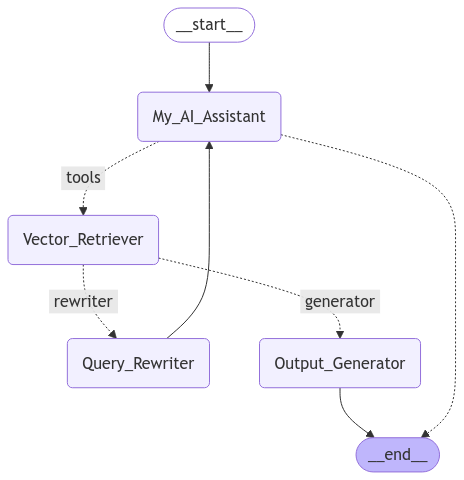

In [47]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph(xray=True).draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [48]:
app.invoke({"messages":["What is a Autonomous Agent?"]})

---CALL AGENT---
this is my message: [HumanMessage(content='What is a Autonomous Agent?', additional_kwargs={}, response_metadata={}, id='79a72290-b684-4f07-b6cb-014c199e52a3')]
message from the grader: [HumanMessage(content='What is a Autonomous Agent?', additional_kwargs={}, response_metadata={}, id='79a72290-b684-4f07-b6cb-014c199e52a3'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_jg24', 'function': {'arguments': '{"query":"What is an autonomous agent?"}', 'name': 'retrieve_blog_posts'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 88, 'prompt_tokens': 1039, 'total_tokens': 1127, 'completion_time': 0.16, 'prompt_time': 0.042113459, 'queue_time': 0.022028597000000004, 'total_time': 0.202113459}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-80a96600-8504-4f54-8324-121094d6a71a-0', tool_calls=[{'name': 'retrieve_blog_posts', 'args': {'query': 'Wh

C:\Users\malah\AppData\Roaming\Python\Python311\site-packages\langsmith\client.py:354: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


this is my response:content='An Autonomous Agent is a system that can plan and act independently to accomplish a goal. It typically involves breaking down complex tasks into smaller steps and using memory to learn and adapt.  Autonomous agents are powered by large language models (LLMs) to process information and make decisions. \n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 59, 'prompt_tokens': 319, 'total_tokens': 378, 'completion_time': 0.107272727, 'prompt_time': 0.012087723, 'queue_time': 0.020480294999999996, 'total_time': 0.11936045}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-0c64fcc9-b429-4861-9146-87e06dd775f2-0' usage_metadata={'input_tokens': 319, 'output_tokens': 59, 'total_tokens': 378}


{'messages': [HumanMessage(content='What is a Autonomous Agent?', additional_kwargs={}, response_metadata={}, id='79a72290-b684-4f07-b6cb-014c199e52a3'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_jg24', 'function': {'arguments': '{"query":"What is an autonomous agent?"}', 'name': 'retrieve_blog_posts'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 88, 'prompt_tokens': 1039, 'total_tokens': 1127, 'completion_time': 0.16, 'prompt_time': 0.042113459, 'queue_time': 0.022028597000000004, 'total_time': 0.202113459}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-80a96600-8504-4f54-8324-121094d6a71a-0', tool_calls=[{'name': 'retrieve_blog_posts', 'args': {'query': 'What is an autonomous agent?'}, 'id': 'call_jg24', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1039, 'output_tokens': 88, 'total_tokens': 1127}),
  ToolMessage(content='LLM Powere

In [49]:
app.invoke({"messages":["What is a prompt engineering?"]})

---CALL AGENT---
this is my message: [HumanMessage(content='What is a prompt engineering?', additional_kwargs={}, response_metadata={}, id='10f10703-946d-4df2-9433-04f8d295d52f')]
message from the grader: [HumanMessage(content='What is a prompt engineering?', additional_kwargs={}, response_metadata={}, id='10f10703-946d-4df2-9433-04f8d295d52f'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_dw1j', 'function': {'arguments': '{"query":"What is prompt engineering?"}', 'name': 'retrieve_blog_posts'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 87, 'prompt_tokens': 1039, 'total_tokens': 1126, 'completion_time': 0.158181818, 'prompt_time': 0.056730532, 'queue_time': 0.02299914, 'total_time': 0.21491235}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-ab37be6c-11f1-4fbd-9e91-b718f615826f-0', tool_calls=[{'name': 'retrieve_blog_posts', 'args': {'query': 'Wha

C:\Users\malah\AppData\Roaming\Python\Python311\site-packages\langsmith\client.py:354: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


this is my response:content='Prompt engineering is a method of communicating with Large Language Models (LLMs) to guide their behavior and achieve desired results.  It involves experimenting with different phrasing and structures to elicit the best possible response from the LLM.  Prompt engineering is an empirical science, meaning its effectiveness depends on testing and refining techniques. \n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 66, 'prompt_tokens': 347, 'total_tokens': 413, 'completion_time': 0.12, 'prompt_time': 0.013716407, 'queue_time': 0.051363542, 'total_time': 0.133716407}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-0e6b49ba-a40a-4ab5-81c1-76681c8eaced-0' usage_metadata={'input_tokens': 347, 'output_tokens': 66, 'total_tokens': 413}


{'messages': [HumanMessage(content='What is a prompt engineering?', additional_kwargs={}, response_metadata={}, id='10f10703-946d-4df2-9433-04f8d295d52f'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_dw1j', 'function': {'arguments': '{"query":"What is prompt engineering?"}', 'name': 'retrieve_blog_posts'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 87, 'prompt_tokens': 1039, 'total_tokens': 1126, 'completion_time': 0.158181818, 'prompt_time': 0.056730532, 'queue_time': 0.02299914, 'total_time': 0.21491235}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-ab37be6c-11f1-4fbd-9e91-b718f615826f-0', tool_calls=[{'name': 'retrieve_blog_posts', 'args': {'query': 'What is prompt engineering?'}, 'id': 'call_dw1j', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1039, 'output_tokens': 87, 'total_tokens': 1126}),
  ToolMessage(content='Prompt Enginee

In [50]:
app.invoke({"messages":["who is a current prime minister of india?"]})

---CALL AGENT---
this is my message: [HumanMessage(content='who is a current prime minister of india?', additional_kwargs={}, response_metadata={}, id='7b8ff7c0-f3b6-4124-abf4-07b1b1a1ae94')]
message from the grader: [HumanMessage(content='who is a current prime minister of india?', additional_kwargs={}, response_metadata={}, id='7b8ff7c0-f3b6-4124-abf4-07b1b1a1ae94'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_1y0r', 'function': {'arguments': '{"query":"Who is the current prime minister of India?"}', 'name': 'retrieve_blog_posts'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 91, 'prompt_tokens': 1042, 'total_tokens': 1133, 'completion_time': 0.165454545, 'prompt_time': 0.033297553, 'queue_time': 0.021918433, 'total_time': 0.198752098}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-81895a62-3ec9-4fff-a666-433ba11c358c-0', tool_calls=[{'name': 're

{'messages': [HumanMessage(content='who is a current prime minister of india?', additional_kwargs={}, response_metadata={}, id='7b8ff7c0-f3b6-4124-abf4-07b1b1a1ae94'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_1y0r', 'function': {'arguments': '{"query":"Who is the current prime minister of India?"}', 'name': 'retrieve_blog_posts'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 91, 'prompt_tokens': 1042, 'total_tokens': 1133, 'completion_time': 0.165454545, 'prompt_time': 0.033297553, 'queue_time': 0.021918433, 'total_time': 0.198752098}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-81895a62-3ec9-4fff-a666-433ba11c358c-0', tool_calls=[{'name': 'retrieve_blog_posts', 'args': {'query': 'Who is the current prime minister of India?'}, 'id': 'call_1y0r', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1042, 'output_tokens': 91, 'total_tokens':

In [51]:
app.invoke({"messages":["what is the current trend in AI"]})

---CALL AGENT---
this is my message: [HumanMessage(content='what is the current trend in AI', additional_kwargs={}, response_metadata={}, id='bc0ed2de-d2bd-4a6f-90cc-1ff66135f35f')]
message from the grader: [HumanMessage(content='what is the current trend in AI', additional_kwargs={}, response_metadata={}, id='bc0ed2de-d2bd-4a6f-90cc-1ff66135f35f'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_jzb1', 'function': {'arguments': '{"query":"current trends in AI"}', 'name': 'retrieve_blog_posts'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 87, 'prompt_tokens': 1040, 'total_tokens': 1127, 'completion_time': 0.158181818, 'prompt_time': 0.032887624, 'queue_time': 0.02150403, 'total_time': 0.191069442}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-80a37b2b-2d2d-4c78-b710-1c0ab76656ee-0', tool_calls=[{'name': 'retrieve_blog_posts', 'args': {'query': 'curre

C:\Users\malah\AppData\Roaming\Python\Python311\site-packages\langsmith\client.py:354: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


this is my response:content="The provided text focuses on AI agents and doesn't mention current trends in AI as a whole.  Therefore, I cannot answer your question based on the given context.  \nTo get information about current AI trends, you might want to look at industry reports or AI research publications. \n" additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 61, 'prompt_tokens': 431, 'total_tokens': 492, 'completion_time': 0.110909091, 'prompt_time': 0.023604279, 'queue_time': 0.033069567, 'total_time': 0.13451337}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-796010cb-de14-47b2-a5ab-afee6453ecfe-0' usage_metadata={'input_tokens': 431, 'output_tokens': 61, 'total_tokens': 492}


{'messages': [HumanMessage(content='what is the current trend in AI', additional_kwargs={}, response_metadata={}, id='bc0ed2de-d2bd-4a6f-90cc-1ff66135f35f'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_jzb1', 'function': {'arguments': '{"query":"current trends in AI"}', 'name': 'retrieve_blog_posts'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 87, 'prompt_tokens': 1040, 'total_tokens': 1127, 'completion_time': 0.158181818, 'prompt_time': 0.032887624, 'queue_time': 0.02150403, 'total_time': 0.191069442}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-80a37b2b-2d2d-4c78-b710-1c0ab76656ee-0', tool_calls=[{'name': 'retrieve_blog_posts', 'args': {'query': 'current trends in AI'}, 'id': 'call_jzb1', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1040, 'output_tokens': 87, 'total_tokens': 1127}),
  ToolMessage(content='[15] Li et al. “API-Bank: